# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



### Not for Grading

###Eigen Faces

Eigenfaces is the name given to a set of eigenvectors when they are used in the computer vision problem of human face recognition. The approach of using eigenfaces for recognition was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification. The eigenvectors are derived from the covariance matrix of the probability distribution over the high-dimensional vector space of face images. The eigenfaces themselves form a basis set of all images used to construct the covariance matrix. This produces dimension reduction by allowing the smaller set of basis images to represent the original training images. Classification can be achieved by comparing how faces are represented by the basis set.The objective of this experiment is to understand how eigen faces can be used to represent the images

In [ ]:
!pip install imageio
!pip install scipy==1.2.1
!wget https://cdn.talentsprint.com/aiml/Experiment_related_data/BLR_Week3/faces.zip
!wget https://cdn.talentsprint.com/aiml/Experiment_related_data/BLR_Week3/output_new.zip
!unzip faces.zip
!unzip output_new.zip

### Importing Required Packages

In [ ]:
from scipy.misc import *
from scipy import linalg
import imageio
import glob
import numpy
import os
import pdb
from matplotlib import pyplot as plt

### Function to load the images from the directory

In [ ]:
def load_images(directory):
    # Get a list of all the picture filenames
    jpgs = glob.glob(directory + '/*')

    # The line below might look long winded, but it basically trying to extract the name (say) Mahendra_Singh_Dhoni from a 
    # ..path such as './faces/Mahendra_Singh_Dhoni_20.jpg' and then mapping this to unique id (such as 1)
    label_dict = {label:index for index, label in enumerate(numpy.unique([''.join(i.split('/')[-1].split('.')[0].split('_')[:-1]) for i in jpgs]))}
    
    # We use now the same logic as above, but this time to fetch the 'id' corresponding to the label in the dictionary created above
    labels = [label_dict[''.join(i.split('/')[-1].split('.')[0].split('_')[:-1])] for i in jpgs]

    # Load a greyscale version of each image
    imgs = numpy.array([imresize(imread(i, True), (224, 224)).flatten() for i in jpgs])
    print(imgs.shape)
    return imgs, labels

### Function to Calculate the eigen faces, weights for each image and mean


We can use two approaches to perform the above task either PCA or SVD


**NOTE:** We use SVD (Singular Value Decomposition) here to get our Eigen vector. It is important to note that another popular method of getting the Eigen vectors is through PCA (Principal Component Analysis), where we perform 'Eigen Decomposition' over the co-variance matrix (which is constructed by multiplying the dataset with its own transpose after adjusting the mean). Please note however that most machine learning libraries help us find the Principal Components (Eigen vectors) simply through a function call (by using either methods mentioned)and hence it is important to focus on the idea of Principal components itself and how it's useful for the ML model (as opposed to understanding the mathematics behind the same, especially if time is a premium) 

In [ ]:
def pca(data):
    mu = numpy.mean(data, 0)

    # mean adjust the data
    ma_data = data - mu

    # Run SVD. The e_faces variable below is what is the Eigen Vectors (also called as Eigen Basis)
    e_faces, sigma, v = linalg.svd(ma_data.transpose(), full_matrices=False)

    # We project the mean adjusted data onto these new Eigen Vectors (or Eigen Basis) to get a weight in each of those directions
    weights = numpy.dot(ma_data, e_faces)
    return e_faces, weights, mu, v

### Function to reconstruct the image . In this function we will be performing the dot product between weights and eigen face then adding the mean value.

In [ ]:
# Below function to recontruct the image; npcs is the no.of principal componets
def reconstruct(img_idx, e_faces, weights, mu, npcs):
    
    # Dot product of weights with the eigenfaces and add to mu. This should reconstruct the image back.
    recon = mu + numpy.dot(weights[img_idx, 0:npcs], e_faces[:, 0:npcs].T)
    return recon

### Function to save the image into a directory named "image"

In [ ]:
def save_image(out_dir, subdir, img_id, img_dims, data):
    directory = out_dir + "/" + subdir

    # If directory not exist, create one
    if not os.path.exists(directory): os.makedirs(directory)

    # Save the image in specified path
    imsave(directory + "/image_" + str(img_id) + ".jpg", data.reshape(img_dims))

### Loading the new set of images

In [ ]:
dir = "./faces"

data, labels = load_images(dir)

(200, 50176)


### Calling the PCA function and storing the eigen faces, weights and mean values

In [ ]:
img_dims = (224,224)
e_faces, weights, mu,v = pca(data)
weights.shape

(200, 200)

In [ ]:
print(weights.shape, len(labels))

(200, 200) 200


In [ ]:
X_train, y_train = weights, labels

In [ ]:
len(X_train), len(y_train)

(200, 200)

###Applying Decision tree classifier

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [ ]:
pred_labels = clf.predict(X_train)

###Calculating the performance metrics confusion matrix and accuracy score

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_train, pred_labels, normalize=True)

1.0

In [ ]:
confusion_matrix(pred_labels, y_train)

array([[20,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 20,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 20,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 20,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 20,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 20,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])

###Plot of data in 2D in Eigen space

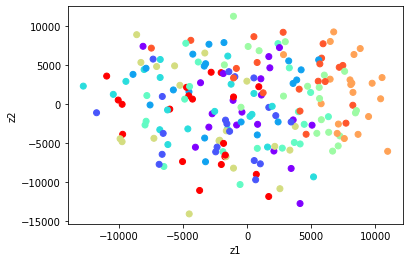

In [ ]:
plt.scatter(weights[:, 0], weights[:, 1], c=labels, cmap='rainbow')
plt.xlabel('z1')
plt.ylabel('z2')
plt.savefig('Faces_in_2d.png')

### Eigen Value Spectrum

In [ ]:
mu = numpy.mean(data, 0)

# mean adjust the data
ma_data = data - mu

Eigen_values, Eigen_vectors = numpy.linalg.eig(ma_data@ma_data.T)

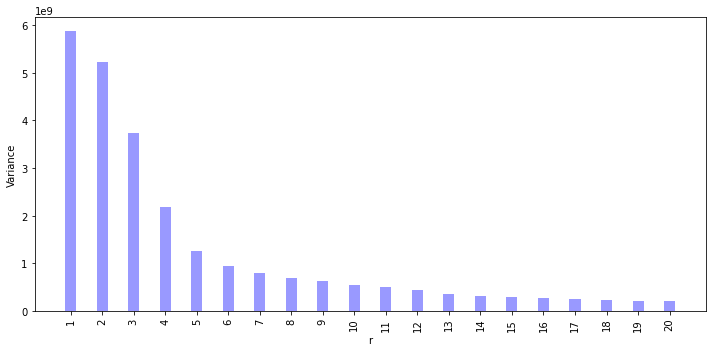

In [ ]:
fig = plt.figure()
fig.set_size_inches(10,5)
index = numpy.arange(len(Eigen_values[:20]))
bar_width = 0.35
opacity = 0.4
error_config = {'ecolor': '0.3'}
rects1 = plt.bar(index , Eigen_values[:20], bar_width,
                 alpha=opacity,
                 color='b',
                 #yerr=std_e1,
                 #error_kw=error_config,
                 label='Eigen value Spectrum')
plt.xticks(index, numpy.arange(Eigen_values.shape[0])+1,  rotation=90)
plt.xlabel('r')
plt.ylabel('Variance')
#plt.legend()

plt.tight_layout()
plt.savefig('Eigen_values_spectrum.png')
plt.show()

### Saving the mean image in output directory and displaying it

In [ ]:
imsave("output_new" + "/mean.jpg", mu.reshape(img_dims))

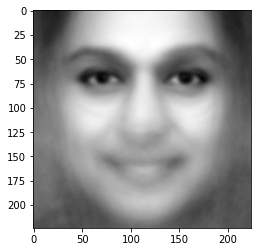

In [ ]:
plt.grid(False)
plt.imshow(mu.reshape(224, 224), cmap='gray')

### Storing the eigen faces as images in directory named "output_new" and display them here

In [ ]:
for i in range(e_faces.shape[1]):
    #continue
    save_image("output_new", "eigenfaces", i, img_dims, e_faces[:,i])

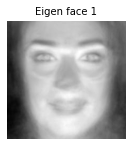

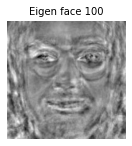

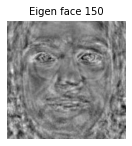

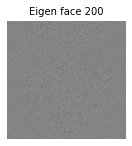

In [ ]:
index = [0, 99, 149, 199]

for j, i in enumerate(index) :
    eigenface = "output_new/eigenfaces/image_"+str(i)+".jpg"
    title = "Eigen face " + str(i+1)
    plt.figure(figsize=(10,10))
    plt.subplot(len(index), j+1,1 )
    plt.axis('off')
    plt.imshow(imread(eigenface, True), cmap='gray')
    plt.title(title, size=10)
    plt.show()

### Checking the shape of a eigen face

In [ ]:
e_faces[:, :].shape

(50176, 200)

### Reconstruction of images and visualizing them

In [ ]:
img_id = 66

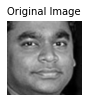

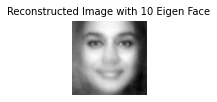

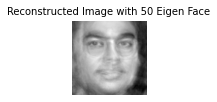

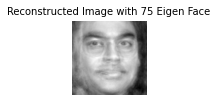

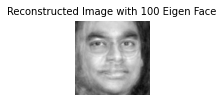

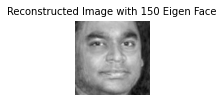

In [ ]:
title = "Original Image" 
plt.figure(figsize=(3,3))
plt.subplot(2, 1,1)
plt.axis('off')
plt.imshow(data[img_id].reshape(224,224), cmap='gray')
plt.title(title, size=10)

for i in [9, 49, 74, 99, 149]:
    img = reconstruct(img_id, e_faces, weights, mu, i)
    img_dims = (224,224)
    path = 'output_new/recon'
    imsave(path+"/recon"+str(i+1)+".jpg", img.reshape(img_dims))
    title = "Reconstructed Image with {} Eigen Face".format(i+1) 
    plt.figure(figsize=(3,3))
    plt.subplot(2, 1,1)
    plt.axis('off')
    plt.imshow(img.reshape(224,224), cmap='gray')
    plt.title(title, size=10)
    plt.show()